In [1]:
import seaborn
import numpy as np
import pandas as pd
import seaborn as sns

import nltk
from sklearn.model_selection import train_test_split

import os

In [40]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/pataoengineer/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/pataoengineer/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# A. Data Exploration

In [2]:
path_csv = os.path.join(os.environ['HOME'], 'data', 'netflix', 'netflix_titles.csv')
dfNetflix = pd.read_csv(path_csv, parse_dates=['date_added'])
dfNetflix.loc[:,'lastnyear'] = 2021-dfNetflix['release_year']
dfNetflix = dfNetflix[dfNetflix.lastnyear <= 15]

In [3]:
len(dfNetflix)

7042

In [4]:
dfNetflix.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
lastnyear                int64
dtype: object

In [5]:
dfNetflix[:3]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,lastnyear
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,5
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",10


## Types of media

<AxesSubplot:xlabel='type', ylabel='count'>

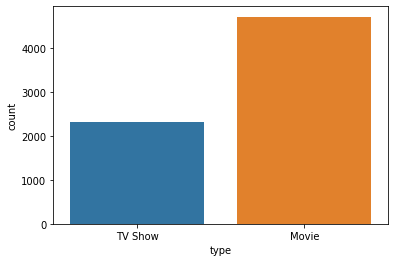

In [6]:
sns.countplot(x=dfNetflix['type'])

## Country of origins

In [7]:
dfCnt = dfNetflix.groupby('country')['show_id'].count()\
    .reset_index(name='count')\
    .sort_values('count',ascending=False)

sumall = dfCnt["count"].sum()
dfCnt.loc[:, "%"] = dfCnt["count"] * 100 / sumall
dfCnt[:10]

,country,count,%
519,United States,2255,34.406469
215,India,774,11.809582
437,United Kingdom,372,5.675923
274,Japan,207,3.158377
372,South Korea,182,2.776930
49,Canada,174,2.654867
380,Spain,134,2.044553
142,France,112,1.708880
423,Turkey,94,1.434239
289,Mexico,93,1.418981


## Recency of movies/shows being added each Quarter

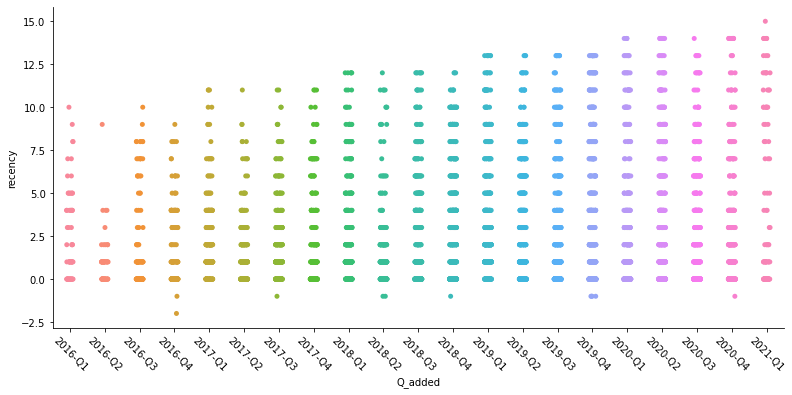

In [8]:
def getQ(dt):
    q = 1+(dt.month-1)//3
    return f'{dt.year}-Q{q}'

def recency(rel_year, dt):
    return dt.year - rel_year

dfAdded = dfNetflix[['release_year','date_added']]
dfAdded = dfAdded[dfAdded['date_added'].notna()]
dfAdded.loc[:,'Q_added'] = dfAdded['date_added'].apply(getQ)
dfAdded.loc[:,'recency'] = dfAdded['date_added'].dt.year - dfAdded['release_year']
dfAdded = dfAdded.sort_values(['Q_added'])

g = sns.catplot(data=dfAdded[dfAdded['Q_added']>='2016-Q1'], x='Q_added', y='recency')
g.set_xticklabels(rotation=315)
g.fig.set_figwidth(12.5)

## Description v Genre

In [9]:
dfDG = dfNetflix[['description','listed_in','title']]
dfDG = dfDG[dfDG.title.str.len()>8]
dfDG.loc[:,'genre'] = dfDG['listed_in'].str.split(', ')
dfDG.drop('listed_in',inplace=True,axis=1)
dfDG

,description,title,genre
20,After accidentally connecting over the Interne...,​​Kuch Bheege Alfaaz,"[Dramas, Independent Movies, International Mov..."
21,"A taxi driver, a gangster and an athlete strug...",​Goli Soda 2,"[Action & Adventure, Dramas, International Mov..."
22,A successful writer returns to the town that l...,​Maj Rati ​​Keteki,"[Dramas, International Movies]"
23,When a middle-aged divorcee returns to Kolkata...,​Mayurakshi,"[Dramas, International Movies]"
24,Seiya and the Knights of the Zodiac rise again...,​SAINT SEIYA: Knights of the Zodiac,"[Anime Series, International TV Shows]"
...,...,...,...
7778,Looking to survive in a world taken over by zo...,Zombieland,"[Comedies, Horror Movies]"
7779,An assortment of talent takes the stage for a ...,Zona Rosa,"[International TV Shows, Spanish-Language TV S..."
7784,"In this documentary, South African rapper Nast...",Zulu Man in Japan,"[Documentaries, International Movies, Music & ..."
7785,Dessert wizard Adriano Zumbo looks for the nex...,Zumbo's Just Desserts,"[International TV Shows, Reality TV]"


## Genres

In [10]:
dfGenres = dfDG['genre'].explode()
dfGenres.value_counts()

International Movies            1668
Dramas                          1355
Comedies                        1062
International TV Shows           965
Documentaries                    677
TV Dramas                        525
Independent Movies               454
TV Comedies                      435
Children & Family Movies         427
Action & Adventure               409
Romantic Movies                  378
Kids' TV                         345
Thrillers                        328
Docuseries                       323
Crime TV Shows                   320
Stand-Up Comedy                  310
Romantic TV Shows                284
Music & Musicals                 239
Horror Movies                    206
Reality TV                       205
British TV Shows                 191
Sports Movies                    145
Sci-Fi & Fantasy                 138
Korean TV Shows                  123
Anime Series                     121
Spanish-Language TV Shows        116
TV Action & Adventure            113
S

# B. Basic Text Exploration

Checking vocab from `title` and `description`

In [11]:
len(dfDG)

5839

## Explore vocaborary size

Removing articles from vocab first

In [41]:
nltk.pos_tag(nltk.word_tokenize('Up among the star'))

[('Up', 'IN'), ('among', 'IN'), ('the', 'DT'), ('star', 'NN')]

In [47]:
def pos_tag(text):
    negatives = ['DT']
    return ' '.join([s.lower() for s,pos in \
                     nltk.pos_tag(nltk.word_tokenize(text)) \
                     if pos not in negatives])
pos_tag = np.vectorize(pos_tag)
dfDG.loc[:,'description-token'] = dfDG['description'].apply(pos_tag)
dfDG.loc[:,'title-token'] = dfDG['title'].apply(pos_tag)
dfDG[['title-token','description-token']]

,title-token,description-token
20,​​kuch bheege alfaaz,"after accidentally connecting over internet , ..."
21,​goli soda 2,"taxi driver , gangster and athlete struggle to..."
22,​maj rati ​​keteki,successful writer returns to town that launche...
23,​mayurakshi,when middle-aged divorcee returns to kolkata t...
24,​saint seiya : knights of zodiac,seiya and knights of zodiac rise again to prot...
...,...,...
7778,zombieland,looking to survive in world taken over by zomb...
7779,zona rosa,assortment of talent takes stage for night of ...
7784,zulu man in japan,"in documentary , south african rapper nasty c ..."
7785,zumbo 's just desserts,dessert wizard adriano zumbo looks for next “ ...


Combining title and description column as `text`

In [52]:
dfDG.loc[:,'text'] = dfDG['title-token'] + dfDG['description-token']

In [53]:
alltext = dfDG['text']
alltext = alltext.str.split(' ').explode(ignore_index=True)
alltext = alltext.str.lower()
len(alltext) # number of distinct words in vocab

152794

Top 50 most frequent words

In [49]:
topwords = alltext.value_counts()[:50]
topwords

,              6071
and            4524
to             4346
of             4094
in             3097
his            2129
's             1603
with           1592
her            1445
:              1278
on             1264
for            1253
their          1118
when            929
from            876
as              796
is              746
he              665
.               650
who             627
by              624
after           618
life            583
that            550
at              539
new             493
but             480
into            454
–               451
family          436
young           434
world           433
up              432
they            417
love            407
man             380
she             379
’               324
two             320
woman           318
friends         318
series          313
out             309
it              291
s               276
documentary     274
are             273
about           270
him             257
``              255


## Top words which appear mostly in each genre

In [50]:
topgenres = dfGenres.value_counts()[:10].index.tolist()
topgenres

['International Movies',
 'Dramas',
 'Comedies',
 'International TV Shows',
 'Documentaries',
 'TV Dramas',
 'Independent Movies',
 'TV Comedies',
 'Children & Family Movies',
 'Action & Adventure']

In [56]:
dfGenreText = dfDG[['genre','text']]
dfGenreText.loc[:,'text'] = dfGenreText['text'].str.split(' ')
dfGenreText = dfGenreText.explode("genre").explode('text')
dfGenreText = dfGenreText[dfGenreText['genre'].isin(topgenres)]
dfGenreText[:3]

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,genre,text
20,Dramas,​​kuch
20,Dramas,bheege
20,Dramas,alfaazafter


In [57]:
top_words_genre = []
for genre, df in dfGenreText.groupby('genre'):
    top = df['text'].value_counts()[:10].reset_index()
    top.columns = ['term','freq']
    top.loc[:,'genre'] = genre
    top.loc[:,'freq%'] = top['freq']/float(len(df))
    top_words_genre.append(top)
dfTopGenreWords = pd.concat(top_words_genre, ignore_index=True)
dfTopGenreWords

,term,freq,genre,freq%
0,.,436,Action & Adventure,0.041552
1,",",371,Action & Adventure,0.035357
2,to,355,Action & Adventure,0.033832
3,of,297,Action & Adventure,0.028305
4,and,208,Action & Adventure,0.019823
...,...,...,...,...
95,in,253,TV Dramas,0.019133
96,her,185,TV Dramas,0.013991
97,his,135,TV Dramas,0.010209
98,'s,130,TV Dramas,0.009831


In [58]:
dfTopGenreWords[dfTopGenreWords['genre'] == 'TV Dramas']

,term,freq,genre,freq%
90,.,579,TV Dramas,0.043787
91,",",522,TV Dramas,0.039477
92,and,423,TV Dramas,0.031990
93,of,389,TV Dramas,0.029418
94,to,371,TV Dramas,0.028057
95,in,253,TV Dramas,0.019133
96,her,185,TV Dramas,0.013991
97,his,135,TV Dramas,0.010209
98,'s,130,TV Dramas,0.009831
99,with,120,TV Dramas,0.009075


# 3. Basic Text Classification Model
Simple TFIDF model with POS

In [72]:
dfBasic = dfDG[['genre','text']]
dfBasic.loc[:,'text'] = dfBasic['text']
dfBasic[:4]

/usr/local/lib/python3.9/site-packages/pandas/core/indexing.py:1843: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,genre,text
20,"[Dramas, Independent Movies, International Mov...",​​kuch bheege alfaazafter accidentally connect...
21,"[Action & Adventure, Dramas, International Mov...","​goli soda 2taxi driver , gangster and athlete..."
22,"[Dramas, International Movies]",​maj rati ​​ketekisuccessful writer returns to...
23,"[Dramas, International Movies]",​mayurakshiwhen middle-aged divorcee returns t...


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

In [74]:
pipe = Pipeline(steps=[
    ("vectoriser",TfidfVectorizer(
        lowercase=True, ngram_range=(1,3))),
    ("logit", LogisticRegression(
        penalty="l2", solver='sag')) # stochastic average gradient descent
])

Train separate binary model for each genre

In [80]:
model_collection = {}
for genre in topgenres:
    print(f'Training model : {genre}', end='')
    def match_genre(gs):
        return int(genre in gs)
    dfLabelled = dfBasic[['genre','text']]
    dfLabelled.loc[:, 'genre'] = dfLabelled['genre'].apply(match_genre)
    # Split
    dfTrain, dfTest = train_test_split(dfLabelled, test_size=0.2)
    model_collection[genre] = pipe.fit(dfTrain['text'], dfTrain['genre'])
    # Eval
    dfTest['pred'] = model_collection[genre].predict(dfTest['text'])
    precision = len(dfTest[dfTest['genre']==dfTest['pred']])/len(dfTest)
    print(f'....precision = {precision:.2f}')


Training model : International Movies

<ipython-input-80-85c80863ecc0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['pred'] = model_collection[genre].predict(dfTest['text'])


....precision = 0.72
Training model : Dramas

<ipython-input-80-85c80863ecc0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['pred'] = model_collection[genre].predict(dfTest['text'])


....precision = 0.77
Training model : Comedies

<ipython-input-80-85c80863ecc0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['pred'] = model_collection[genre].predict(dfTest['text'])


....precision = 0.82
Training model : International TV Shows

<ipython-input-80-85c80863ecc0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['pred'] = model_collection[genre].predict(dfTest['text'])


....precision = 0.86
Training model : Documentaries

<ipython-input-80-85c80863ecc0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['pred'] = model_collection[genre].predict(dfTest['text'])


....precision = 0.87
Training model : TV Dramas

<ipython-input-80-85c80863ecc0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['pred'] = model_collection[genre].predict(dfTest['text'])


....precision = 0.91
Training model : Independent Movies

<ipython-input-80-85c80863ecc0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['pred'] = model_collection[genre].predict(dfTest['text'])


....precision = 0.93
Training model : TV Comedies

<ipython-input-80-85c80863ecc0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['pred'] = model_collection[genre].predict(dfTest['text'])


....precision = 0.92
Training model : Children & Family Movies

<ipython-input-80-85c80863ecc0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['pred'] = model_collection[genre].predict(dfTest['text'])


....precision = 0.92
Training model : Action & Adventure....precision = 0.93


<ipython-input-80-85c80863ecc0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfTest['pred'] = model_collection[genre].predict(dfTest['text'])
